In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
ages=df['Age']
#print("\n-- the 'Age' column --\n")
print(ages.head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
subset = df[['Age', 'Sex', 'Survived']]
print(subset.head())

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0


In [ ]:
survived_mask= df['Survived'] == 1
survivors = df[survived_mask]
print(survivors.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


In [ ]:
female_thirdC = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]
print(f"Number of females in third class: {len(female_thirdC)}"  )
print(female_thirdC.head())

Number of females in third class: 144
    PassengerId  Survived  Pclass  \
2             3         1       3   
8             9         1       3   
10           11         1       3   
14           15         0       3   
18           19         0       3   

                                                 Name     Sex   Age  SibSp  \
2                              Heikkinen, Miss. Laina  female  26.0      0   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   

    Parch            Ticket     Fare Cabin Embarked  
2       0  STON/O2. 3101282   7.9250   NaN        S  
8       2            347742  11.1333   NaN        S  
10      1           PP 9549  16.7000    G6        S  
14      0            350406   7.8542   NaN        S  


In [ ]:
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]
print(male_survived.head())
print('mean_of_ages \n', male_survived.Age.mean())

   PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S  
mean_of_ages 
 31.618055555555557


In [ ]:
fare_more_than_100 = df[df['Fare'] > 100]
print(fare_more_than_100['Name'].head())

27                     Fortune, Mr. Charles Alexander
31     Spencer, Mrs. William Augustus (Marie Eugenie)
88                         Fortune, Miss. Mabel Helen
118                          Baxter, Mr. Quigg Edmond
195                              Lurette, Miss. Elise
Name: Name, dtype: object


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Cabin'].apply(type).value_counts()

,count
Cabin,
<class 'float'>,687
<class 'str'>,204


In [ ]:
df['IsChild'] = df['Age'] < 18
print(df[['Age', 'IsChild']].head(10))

         Age  IsChild
0  22.000000    False
1  38.000000    False
2  26.000000    False
3  35.000000    False
4  35.000000    False
5  29.699118    False
6  54.000000    False
7   2.000000     True
8  27.000000    False
9  14.000000     True


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [ ]:
%matplotlib inline

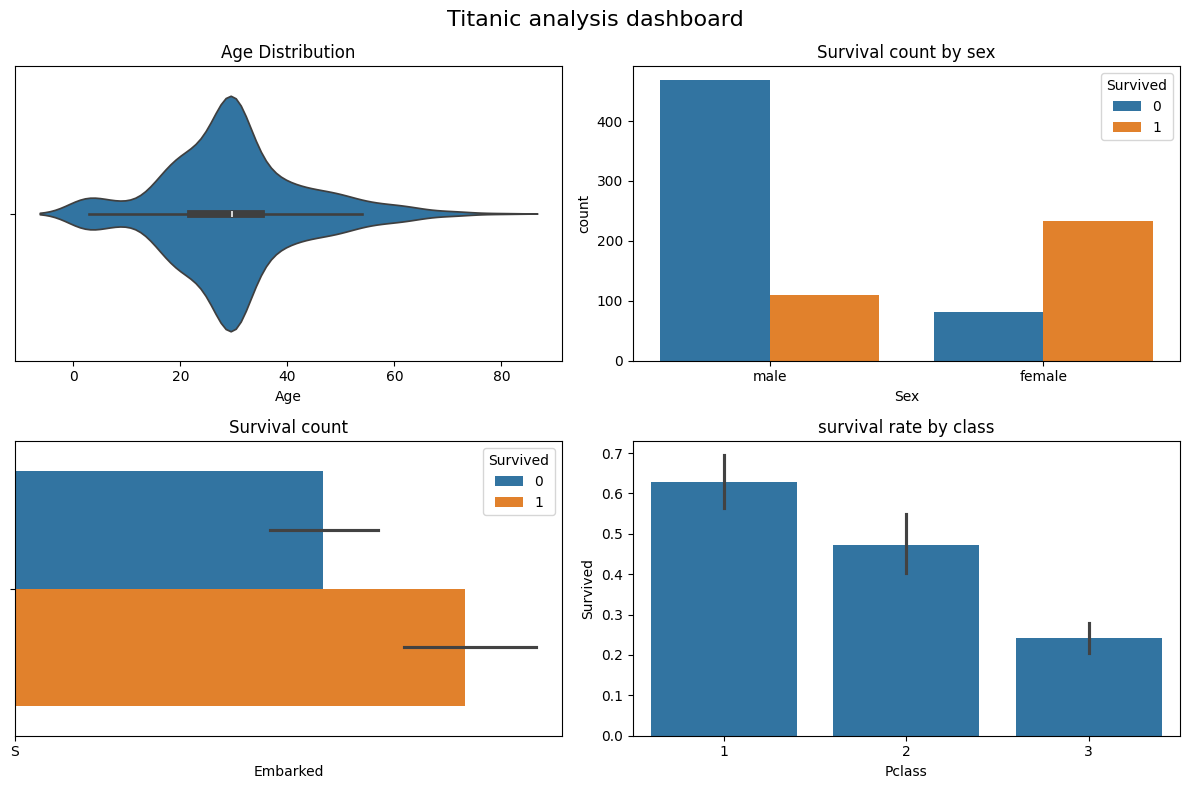

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.violinplot(data= df, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival count by sex')

sns.barplot(x='Embarked', hue='Survived', data=df , ax=axes[1, 0])
axes[1, 0].set_title('Survival count')

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1,1])
axes[1,1].set_title('survival rate by class')

fig.suptitle('Titanic analysis dashboard', fontsize=16)
plt.tight_layout(rect=[0,0,1,1])
plt.show()

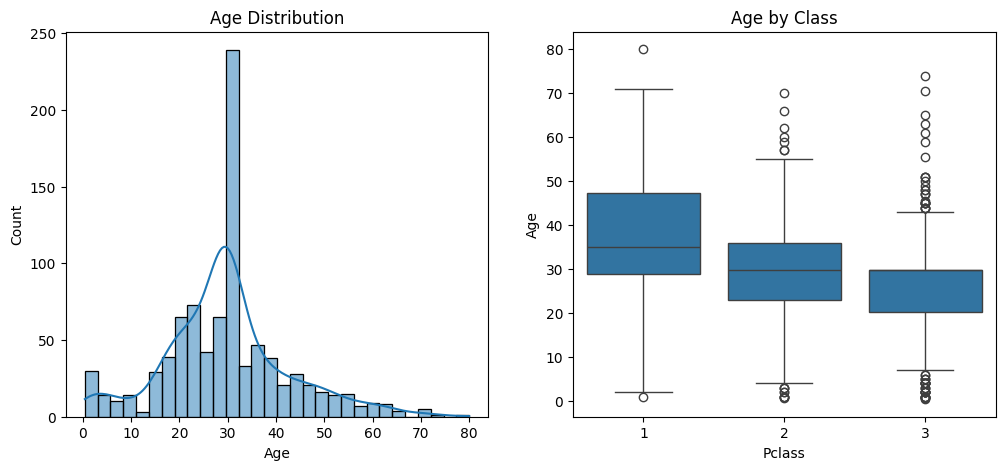

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Class')

plt.show()

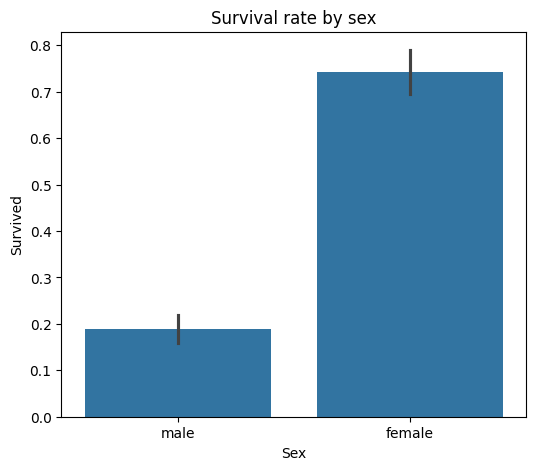

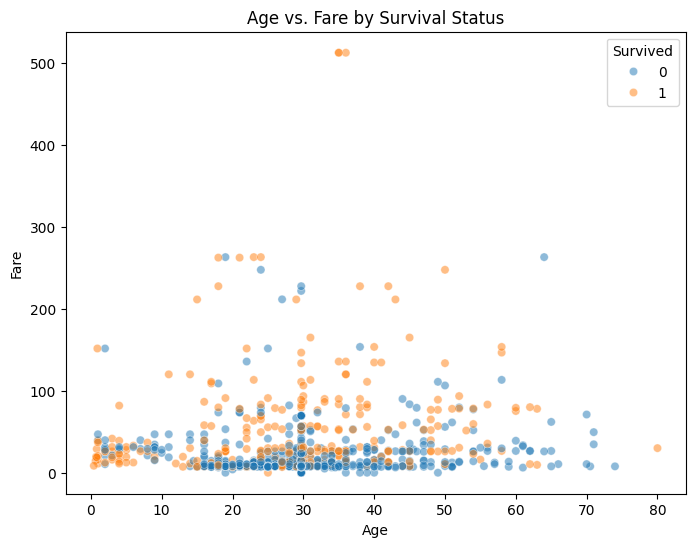

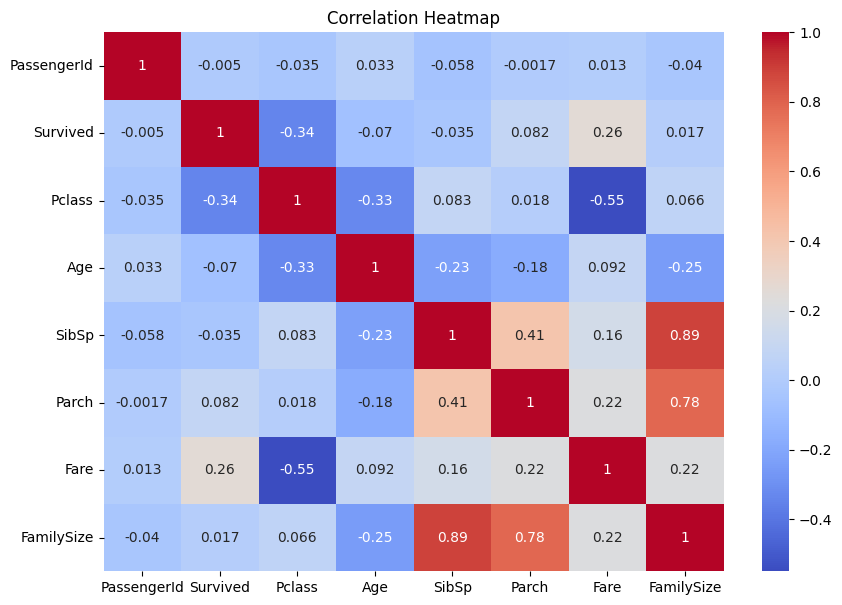

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by sex')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.5)
plt.title('Age vs. Fare by Survival Status')
plt.show()

plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  IsChild      891 non-null    bool   
 13  FamilySize   891 non-null    int64  
dtypes: bool(1), float64(2), int64(6), object(5)
memory usage: 91.5+ KB


In [ ]:
most_common_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_port, inplace=True)

sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
print("Sex Dummies:")
print(sex_dummies.head())

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
print("\nEmbarked Dummies:")
print(embarked_dummies.head())

Sex Dummies:
   Sex_male
0      True
1     False
2     False
3     False
4      True

Embarked Dummies:
   Embarked_Q  Embarked_S
0       False        True
1       False       False
2       False        True
3       False        True
4       False        True


/tmp/ipython-input-1970641312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_port, inplace=True)


In [ ]:
df= pd.concat([df, sex_dummies, embarked_dummies], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,IsChild,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,2,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,2,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,2,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,1,True,False,True


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

print("\n--- DataFrame After Dropping Columns ---")
print(df.head())


--- DataFrame After Dropping Columns ---
   Survived  Pclass   Age  SibSp  Parch     Fare  IsChild  FamilySize  \
0         0       3  22.0      1      0   7.2500    False           2   
1         1       1  38.0      1      0  71.2833    False           2   
2         1       3  26.0      0      0   7.9250    False           1   
3         1       1  35.0      1      0  53.1000    False           2   
4         0       3  35.0      0      0   8.0500    False           1   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  


In [ ]:
columns_to_scale= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
df[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])
print(df.head)

<bound method NDFrame.head of      Survived    Pclass       Age     SibSp     Parch      Fare  IsChild  \
0           0  0.827377 -0.592481  0.432793 -0.473674 -0.502445    False   
1           1 -1.566107  0.638789  0.432793 -0.473674  0.786845    False   
2           1  0.827377 -0.284663 -0.474545 -0.473674 -0.488854    False   
3           1 -1.566107  0.407926  0.432793 -0.473674  0.420730    False   
4           0  0.827377  0.407926 -0.474545 -0.473674 -0.486337    False   
..        ...       ...       ...       ...       ...       ...      ...   
886         0 -0.369365 -0.207709 -0.474545 -0.473674 -0.386671    False   
887         1 -1.566107 -0.823344 -0.474545 -0.473674 -0.044381    False   
888         0  0.827377  0.000000  0.432793  2.008933 -0.176263    False   
889         1 -1.566107 -0.284663 -0.474545 -0.473674 -0.044381    False   
890         0  0.827377  0.177063 -0.474545 -0.473674 -0.492378    False   

     FamilySize  Sex_male  Embarked_Q  Embarked_S  
0    

In [ ]:
X= df.drop('Survived', axis=1)
y= df['Survived']
print(X.shape)
print(y.shape)

(891, 10)
(891,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 10)
(179, 10)
(712,)
(179,)


In [ ]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
print(predictions[:10])
print(y_test[:10].values)

[0 0 0 1 1 1 1 0 1 1]
[1 0 0 1 1 1 1 0 1 1]


In [ ]:
accuracy= accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("\n confusion Matrix")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report")
print(classification_report(y_test, predictions))

Accuracy: 0.8044692737430168

 confusion Matrix
[[90 15]
 [20 54]]

 Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
prediction = rf_model.predict(X_test)
print(prediction[:10])
print(y_test[:10].values)

[0 0 0 1 0 1 1 0 1 1]
[1 0 0 1 1 1 1 0 1 1]


In [ ]:
accuracy= accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy}")
print("\n confusion Matrix")
print(confusion_matrix(y_test, prediction))
print("\n Classification Report")
print(classification_report(y_test, prediction))

Accuracy: 0.8212290502793296

 confusion Matrix
[[92 13]
 [19 55]]

 Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

